**Learning Python -- The Programming Language for Artificial Intelligence and Data Science**

**Lecture: Introduction to Autonomous Driving and PID Control**

**By Allen Y. Yang, PhD**

(c) Copyright Intelligent Racing Inc., 2020-2024. All rights reserved. Materials may NOT be distributed or used for any commercial purposes.

Welcome to this comprehensive lecture on autonomous driving and PID control algorithms. This course material is developed by Dr. Allen Y. Yang, faculty at the Department of EECS at the University of California, Berkeley. 

In this lecture, we will explore the fascinating world of autonomous vehicles, from their historical development to modern control algorithms. We'll start with understanding the different levels of vehicle autonomy, examine the system architecture of self-driving cars, and then dive deep into PID (Proportional-Integral-Derivative) control - one of the most fundamental control algorithms used in robotics and autonomous systems.

By the end of this lecture, you will:
1. Understand the five levels of vehicle autonomy
2. Grasp the system architecture of autonomous vehicles
3. Master the mathematical foundations of vehicle kinematics
4. Implement PID control algorithms for vehicle steering and speed control
5. Build and test your own autonomous vehicle controller in simulation

# Keywords

* **Autonomous Driving**: The capability of a vehicle to sense its environment and operate without human input
* **Vehicle Autonomy Levels**: SAE International's classification system from Level 0 (no automation) to Level 5 (full automation)
* **Bicycle Model**: A simplified mathematical model representing a four-wheeled vehicle as a two-wheeled bicycle for control purposes
* **PID Controller**: A control loop mechanism employing Proportional, Integral, and Derivative terms to minimize error
* **Cross-Track Error (CTE)**: The perpendicular distance between the vehicle and the desired trajectory
* **Kinematic Model**: Mathematical equations describing the motion of a vehicle without considering forces
* **Degrees of Freedom (DoF)**: The number of independent parameters that define the configuration of a mechanical system
* **ROAR Platform**: Robot Open Autonomous Racing platform developed at UC Berkeley for autonomous vehicle research

# Part 1: Introduction to Autonomous Driving

## Brief History of Vehicle Autonomy

The journey toward autonomous vehicles has been a long and fascinating one. Let's explore some key milestones:

### Early Transportation Revolution (1879-1950s)
- **1879**: Karl Benz patented the first gasoline engine for vehicles
- **1913**: Henry Ford revolutionized manufacturing with assembly lines, reducing build time from 12 hours to 2.5 hours
- **1920s**: The automobile industry enabled massive consumer credit markets, with 75% of car sales paid over time

### Dawn of Vehicle Automation (1948-2009)
- **1948**: Ralph Teetor invented cruise control - the first automated vehicle control system
- **1995**: Oldsmobile introduced GPS navigation in US production cars
- **2005**: Stanford's "Stanley" won the DARPA Grand Challenge, completing a desert course in 6h 54m
- **2009**: Google (later Waymo) began developing self-driving systems

## Five Levels of Vehicle Autonomy

The Society of Automotive Engineers (SAE) has defined six levels of driving automation, from Level 0 (no automation) to Level 5 (full automation):

### Detailed Level Descriptions:

**Level 0 - No Automation**: The driver performs all driving tasks

**Level 1 - Driver Assistance**: Vehicle can assist with either steering OR acceleration/deceleration
- Examples: Cruise control, lane keeping assistance

**Level 2 - Partial Automation**: Vehicle can control both steering AND acceleration/deceleration
- Examples: Tesla Autopilot, GM Super Cruise
- Driver must remain engaged and monitor the environment

**Level 3 - Conditional Automation**: Vehicle can handle all driving tasks in certain conditions
- Driver must be ready to take control when requested
- Example: Audi Traffic Jam Pilot

**Level 4 - High Automation**: Vehicle can handle all driving tasks in specific conditions/areas
- No driver intervention needed within operational domain
- Example: Waymo robotaxis in specific cities

**Level 5 - Full Automation**: Vehicle can drive anywhere, anytime without human intervention
- No steering wheel or pedals needed
- Currently not commercially available

## System Architecture for L4-L5 Autonomy

A fully autonomous vehicle requires several interconnected systems working in harmony. Let's examine the key components:

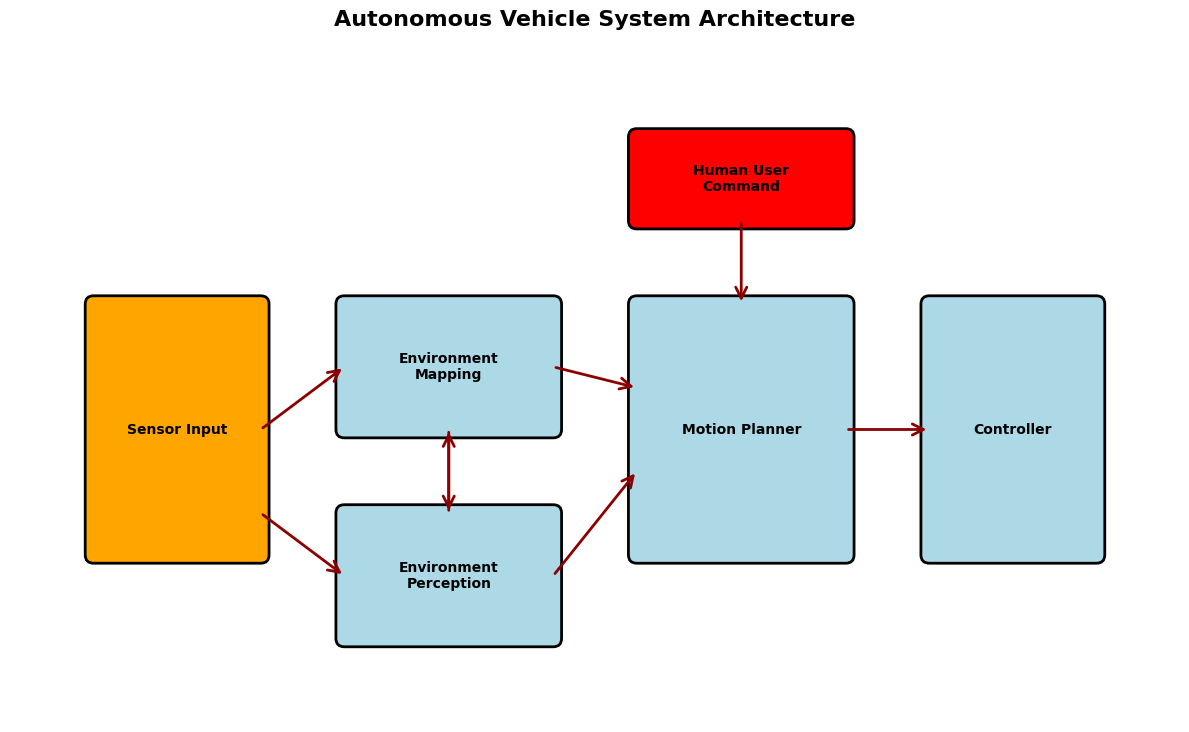

In [1]:
# Visualize the system architecture
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

fig, ax = plt.subplots(figsize=(12, 8))

# Define component positions and sizes
components = {
    'Sensor Input': (1, 4, 2, 3),
    'Environment\nMapping': (4, 5.5, 2.5, 1.5),
    'Environment\nPerception': (4, 3, 2.5, 1.5),
    'Motion Planner': (7.5, 4, 2.5, 3),
    'Controller': (11, 4, 2, 3),
    'Human User\nCommand': (7.5, 8, 2.5, 1)
}

# Draw components
for name, (x, y, w, h) in components.items():
    if 'Sensor' in name:
        color = 'orange'
    elif 'Human' in name:
        color = 'red'
    else:
        color = 'lightblue'
    
    box = FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.1",
                         facecolor=color, edgecolor='black', linewidth=2)
    ax.add_patch(box)
    ax.text(x + w/2, y + h/2, name, ha='center', va='center', fontsize=10, weight='bold')

# Draw arrows
arrows = [
    ((3, 5.5), (4, 6.25)),  # Sensor to Mapping
    ((3, 4.5), (4, 3.75)),  # Sensor to Perception
    ((6.5, 6.25), (7.5, 6)),  # Mapping to Planner
    ((6.5, 3.75), (7.5, 5)),  # Perception to Planner
    ((10, 5.5), (11, 5.5)),  # Planner to Controller
    ((8.75, 8), (8.75, 7)),  # Human to Planner
    ((5.25, 5.5), (5.25, 4.5)),  # Mapping to Perception bidirectional
    ((5.25, 4.5), (5.25, 5.5))
]

for start, end in arrows:
    arrow = FancyArrowPatch(start, end, arrowstyle='->', mutation_scale=20,
                           color='darkred', linewidth=2)
    ax.add_patch(arrow)

ax.set_xlim(0, 14)
ax.set_ylim(2, 10)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Autonomous Vehicle System Architecture', fontsize=16, weight='bold', pad=20)

plt.tight_layout()
plt.show()

### System Components Explained:

1. **Sensor Input**
   - Spatial Sensing: Ultrasound (short), LIDAR/Depth Cameras (medium), RGB Cameras (long)
   - Global Positioning: GPS
   - Vehicle State: IMU, wheel speed sensors, steering angle sensors

2. **Environment Mapping**
   - 3D Localization
   - Road condition mapping (lanes, boundaries, traffic signs)

3. **Environment Perception**
   - Object detection and recognition
   - Object tracking and prediction

4. **Motion Planner**
   - Mission Planner: Long-distance route planning
   - Behavior Planner: Real-time decisions (overtake, stop, follow)
   - Local Planner: Immediate waypoints and trajectories

5. **Controller**
   - Longitudinal Control: Speed and acceleration
   - Lateral Control: Steering and orientation
   - Control algorithms: PID, MPC, Pure Pursuit

# Part 2: Vehicle Kinematics and the Bicycle Model

## Degrees of Freedom in Robotics

Before diving into vehicle control, let's understand degrees of freedom (DoF):
- Rigid body in 3D space: 6 DoF (x, y, z, roll, pitch, yaw)
- Ground vehicles: 3 DoF (x, y, θ) - constrained to ground plane
- Human arm: 7 DoF (3 shoulder + 2 elbow + 2 wrist)

## The Simplified Bicycle Model

For control purposes, we often simplify a four-wheeled vehicle to a two-wheeled "bicycle" model:

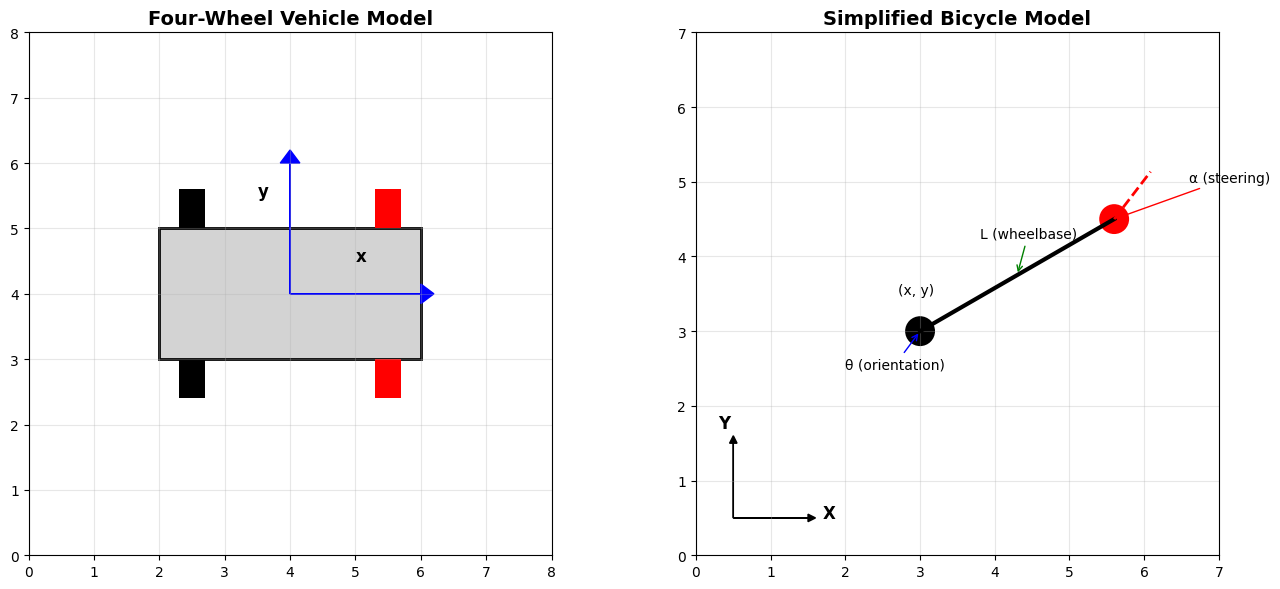

In [2]:
# Visualize the bicycle model
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, Circle
from matplotlib.transforms import Affine2D

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Four-wheel model
ax1.set_title('Four-Wheel Vehicle Model', fontsize=14, weight='bold')
car_body = Rectangle((2, 3), 4, 2, facecolor='lightgray', edgecolor='black', linewidth=2)
ax1.add_patch(car_body)

# Wheels
wheel_positions = [(2.5, 2.7), (5.5, 2.7), (2.5, 5.3), (5.5, 5.3)]
for x, y in wheel_positions:
    if x < 4:  # rear wheels
        wheel = Rectangle((x-0.2, y-0.3), 0.4, 0.6, facecolor='black')
    else:  # front wheels (steered)
        wheel = Rectangle((x-0.2, y-0.3), 0.4, 0.6, facecolor='red')
    ax1.add_patch(wheel)

ax1.arrow(4, 4, 2, 0, head_width=0.3, head_length=0.2, fc='blue', ec='blue')
ax1.text(5, 4.5, 'x', fontsize=12, weight='bold')
ax1.arrow(4, 4, 0, 2, head_width=0.3, head_length=0.2, fc='blue', ec='blue')
ax1.text(3.5, 5.5, 'y', fontsize=12, weight='bold')

ax1.set_xlim(0, 8)
ax1.set_ylim(0, 8)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

# Bicycle model
ax2.set_title('Simplified Bicycle Model', fontsize=14, weight='bold')

# Vehicle parameters
L = 3  # wheelbase
x, y = 3, 3
theta = np.pi/6  # orientation
alpha = np.pi/8  # steering angle

# Draw vehicle body as a line
rear_x, rear_y = x, y
front_x = x + L * np.cos(theta)
front_y = y + L * np.sin(theta)

ax2.plot([rear_x, front_x], [rear_y, front_y], 'k-', linewidth=3)

# Rear wheel (black)
rear_wheel = Circle((rear_x, rear_y), 0.2, facecolor='black')
ax2.add_patch(rear_wheel)

# Front wheel (red, steered)
front_wheel = Circle((front_x, front_y), 0.2, facecolor='red')
ax2.add_patch(front_wheel)

# Show steering angle
steer_x = front_x + 0.8 * np.cos(theta + alpha)
steer_y = front_y + 0.8 * np.sin(theta + alpha)
ax2.plot([front_x, steer_x], [front_y, steer_y], 'r--', linewidth=2)

# Annotations
ax2.annotate('L (wheelbase)', xy=((rear_x+front_x)/2, (rear_y+front_y)/2), 
             xytext=((rear_x+front_x)/2-0.5, (rear_y+front_y)/2+0.5),
             arrowprops=dict(arrowstyle='->', color='green'))
ax2.annotate('α (steering)', xy=(front_x, front_y), 
             xytext=(front_x+1, front_y+0.5),
             arrowprops=dict(arrowstyle='->', color='red'))
ax2.annotate('θ (orientation)', xy=(rear_x, rear_y), 
             xytext=(rear_x-1, rear_y-0.5),
             arrowprops=dict(arrowstyle='->', color='blue'))
ax2.text(rear_x-0.3, rear_y+0.5, '(x, y)', fontsize=10)

# Coordinate system
ax2.arrow(0.5, 0.5, 1, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')
ax2.text(1.7, 0.5, 'X', fontsize=12, weight='bold')
ax2.arrow(0.5, 0.5, 0, 1, head_width=0.1, head_length=0.1, fc='black', ec='black')
ax2.text(0.3, 1.7, 'Y', fontsize=12, weight='bold')

ax2.set_xlim(0, 7)
ax2.set_ylim(0, 7)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Kinematic Equations for the Bicycle Model

Given steering angle α and forward distance d, we can calculate the new vehicle position using kinematic equations.

### Case 1: Small or Zero Steering Angle
When α ≈ 0, the vehicle moves approximately straight:
- x' = x + d·cos(θ)
- y' = y + d·sin(θ)
- θ' = θ

### Case 2: Significant Steering Angle
When α is significant, the vehicle follows a circular arc:
- Turning radius: R = L/tan(α)
- Angular displacement: β = d/R
- Center of rotation: (xc, yc) = (x - R·sin(θ), y + R·cos(θ))
- New position: x' = xc + R·sin(θ + β), y' = yc - R·cos(θ + β)
- New orientation: θ' = (θ + β) % 2π


# Part 3: PID Control Theory

## What is PID Control?

PID (Proportional-Integral-Derivative) control is one of the most widely used methods in control theory, especially in autonomous systems. It uses three components to regulate systems and ensure precise control over their behavior:

### Proportional Control (P)
- **Function**: Generates a control action proportional to the current error (the difference between the desired setpoint and the actual state).
- **Advantages**: Fast response to changes.
- **Disadvantages**: Can result in oscillations and a persistent steady-state error (the system doesn't perfectly reach the setpoint).

### Proportional-Derivative Control (PD)
- **Function**: Adds a derivative term that responds to the rate of error change. It helps to dampen the oscillations caused by proportional control.
- **Advantages**: Reduces overshoot and oscillation, stabilizing the system faster.
- **Disadvantages**: May still have a steady-state error.

### Proportional-Integral-Derivative Control (PID)
- **Function**: Adds an integral term that accumulates the historical error. This helps eliminate steady-state error, ensuring the system accurately achieves the setpoint.
- **Advantages**: Provides the most accurate and stable control when tuned correctly.
- **Disadvantages**: Requires careful tuning, especially of the integral term, to avoid integral windup (accumulation of excessive error leading to instability).

Below, you'll find demonstrations showing clearly how each of these controllers behaves in response to changing setpoints.


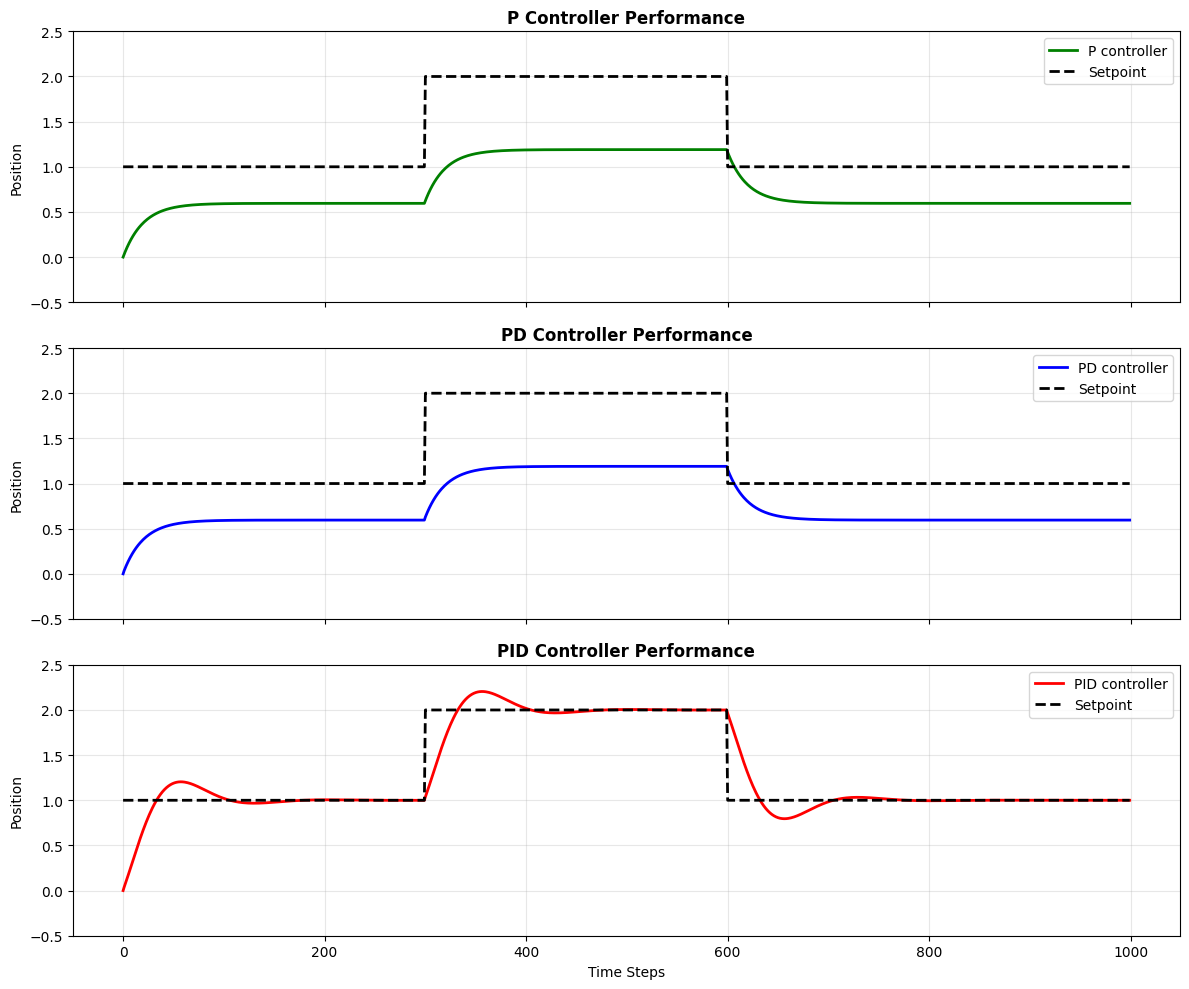

In [3]:

# Improved PID Demonstration
import numpy as np
import matplotlib.pyplot as plt

def simulate_controller(controller_type, setpoint_changes, n_steps=1000):
    # Controller gains (tuned for better demonstration)
    Kp = 0.6
    Kd = 0.1
    Ki = 0.05

    # Initialize variables
    position = np.zeros(n_steps)
    setpoint = np.zeros(n_steps)
    error_integral = 0
    prev_error = 0

    # Define setpoint trajectory
    for start, end, value in setpoint_changes:
        setpoint[start:end] = value

    # Simulate control loop
    for i in range(1, n_steps):
        error = setpoint[i] - position[i-1]
        error_integral += error
        error_derivative = error - prev_error

        if controller_type == 'P':
            control = Kp * error
        elif controller_type == 'PD':
            control = Kp * error + Kd * error_derivative
        elif controller_type == 'PID':
            control = Kp * error + Kd * error_derivative + Ki * error_integral

        # Improved dynamics to simulate realistic response
        position[i] = position[i-1] + control * 0.05

        # Add realistic damping
        position[i] *= 0.98

        prev_error = error

    return position, setpoint

# Define setpoint changes clearly
setpoint_changes = [(0, 300, 1), (300, 600, 2), (600, 1000, 1)]

# Plot controllers
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
controllers = ['P', 'PD', 'PID']
colors = ['green', 'blue', 'red']

for controller, color, ax in zip(controllers, colors, axes):
    position, setpoint = simulate_controller(controller, setpoint_changes)

    ax.plot(position, label=f'{controller} controller', color=color, linewidth=2)
    ax.plot(setpoint, label='Setpoint', color='black', linestyle='--', linewidth=2)
    ax.set_ylabel('Position')
    ax.set_title(f'{controller} Controller Performance', fontsize=12, weight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-0.5, 2.5)

axes[-1].set_xlabel('Time Steps')
plt.tight_layout()
plt.show()


# Part 4: Implementing PID Control for Autonomous Vehicles

Now let's implement the complete PID control system for our vehicle. We'll use the provided Vehicle2D class and add PID controllers for both steering and speed.

## Vehicle2D Class Implementation

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Vehicle2D(object):
    def __init__(self, length=10.0):
        """
        Creates 2D vehicle model and initializes location (0,0) & orientation 0.
        """
        self.x = 0.0
        self.y = 0.0
        self.orientation = 0.0
        self.length = length
        self.steering_noise = 0.0
        self.distance_noise = 0.0
        self.steering_drift = 0.0

    def set(self, x, y, orientation):
        """
        Sets the vehicle coordinates and orientation.
        """
        self.x = x
        self.y = y
        self.orientation = orientation % (2.0 * np.pi)

    def set_noise(self, steering_noise, distance_noise):
        """
        Sets the noise parameters.
        """
        self.steering_noise = steering_noise
        self.distance_noise = distance_noise

    def set_steering_drift(self, drift):
        """
        Sets the systematical steering drift parameter
        """
        self.steering_drift = drift

    def move(self, steering, distance, tolerance=0.001, max_steering_angle=np.pi / 4.0):
        """
        steering = front wheel steering angle, limited by max_steering_angle
        distance = total distance driven, must be non-negative
        """
        if max_steering_angle > np.pi/2:
            raise ValueError("Max steering angle cannot be greater than 90-degree.")

        if steering > max_steering_angle:
            steering = max_steering_angle
        if steering < -max_steering_angle:
            steering = -max_steering_angle
        if distance < 0.0:
            distance = 0.0

        # apply noise
        steering2 = random.gauss(steering, self.steering_noise)
        distance2 = random.gauss(distance, self.distance_noise)

        # apply steering drift
        steering2 += self.steering_drift

        # Execute motion
        turn = np.tan(steering2) * distance2 / self.length

        if abs(turn) < tolerance:
            # approximate by straight line motion
            self.x += distance2 * np.cos(self.orientation)
            self.y += distance2 * np.sin(self.orientation)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
        else:
            # approximate bicycle model for motion
            radius = distance2 / turn
            cx = self.x - (np.sin(self.orientation) * radius)
            cy = self.y + (np.cos(self.orientation) * radius)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
            self.x = cx + (np.sin(self.orientation) * radius)
            self.y = cy - (np.cos(self.orientation) * radius)

    def compute_error(self, track):
        """
        Compute cross-track error relative to the given track
        """
        min_distance = float('inf')
        error = 0
        for i in range(len(track)):
            distance = np.linalg.norm(np.array([self.x, self.y]) - np.array(track[i]))
            if distance < min_distance:
                min_distance = distance
                # This error only assumes cte based on y-axis
                error = self.y - track[i][1]
        return error

    def run_PID(self, track, K_p, K_d, K_i, n=500, speed=1.0):
        """
        Run the vehicle using PID control along the given track
        """
        x_trajectory = []
        y_trajectory = []
    
        prev_error = self.compute_error(track)
        cumulative_error = 0
        
        for _ in range(n):
            current_error = self.compute_error(track)
            cumulative_error += current_error
            diff = current_error - prev_error
            prev_error = current_error
            
            # PID control equation
            steer = -K_p * current_error - K_d * diff - K_i * cumulative_error
            
            self.move(steer, speed)
            x_trajectory.append(self.x)
            y_trajectory.append(self.y)
        
        return x_trajectory, y_trajectory

    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f]' % (self.x, self.y, self.orientation)

## Testing PID Control with Different Scenarios

Let's test our PID controller with various track configurations and see how it performs:

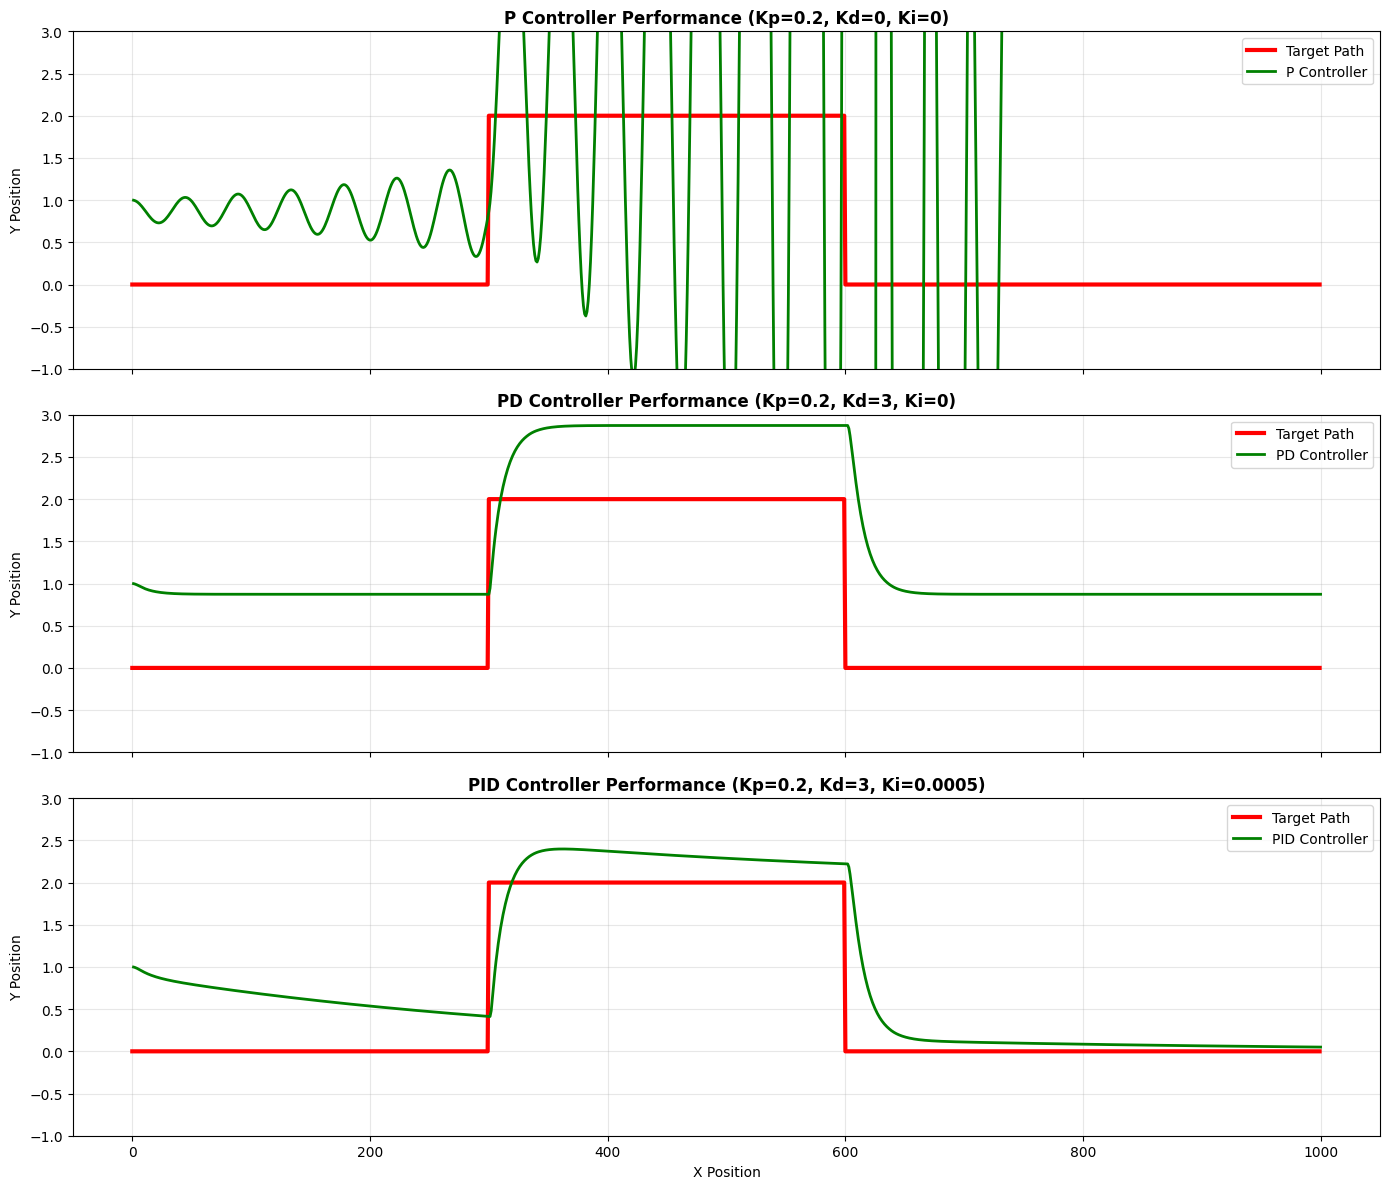

In [5]:
# Test 1: Simple straight track with sudden lane change
vehicle = Vehicle2D()
vehicle.set(0, 1, 0)
vehicle.set_steering_drift(10/180.*np.pi)  # 10 degree bias

# Create track with lane change
track_length = 1000
targets = []
track_x = []
track_y = []

# First segment: y = 0
for i in range(300):
    targets.append([i, 0])
    track_x.append(i)
    track_y.append(0)

# Second segment: y = 2 (lane change)
for i in range(300, 600):
    targets.append([i, 2])
    track_x.append(i)
    track_y.append(2)

# Third segment: y = 0
for i in range(600, track_length):
    targets.append([i, 0])
    track_x.append(i)
    track_y.append(0)

# Test different controller configurations
controllers = [
    ('P Controller', 0.2, 0, 0),
    ('PD Controller', 0.2, 3, 0),
    ('PID Controller', 0.2, 3, 0.0005)
]

fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

for idx, (name, Kp, Kd, Ki) in enumerate(controllers):
    # Reset vehicle
    vehicle = Vehicle2D()
    vehicle.set(0, 1, 0)
    vehicle.set_steering_drift(10/180.*np.pi)
    
    # Run PID
    x_traj, y_traj = vehicle.run_PID(targets, Kp, Kd, Ki, track_length)
    
    # Plot
    ax = axes[idx]
    ax.plot(track_x, track_y, 'r-', linewidth=3, label='Target Path')
    ax.plot(x_traj, y_traj, 'g-', linewidth=2, label=name)
    ax.set_ylabel('Y Position')
    ax.set_title(f'{name} Performance (Kp={Kp}, Kd={Kd}, Ki={Ki})', fontsize=12, weight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-1, 3)

axes[-1].set_xlabel('X Position')
plt.tight_layout()
plt.show()

## Analyzing PID Performance

Let's analyze the performance of each controller by examining the cross-track error over time:

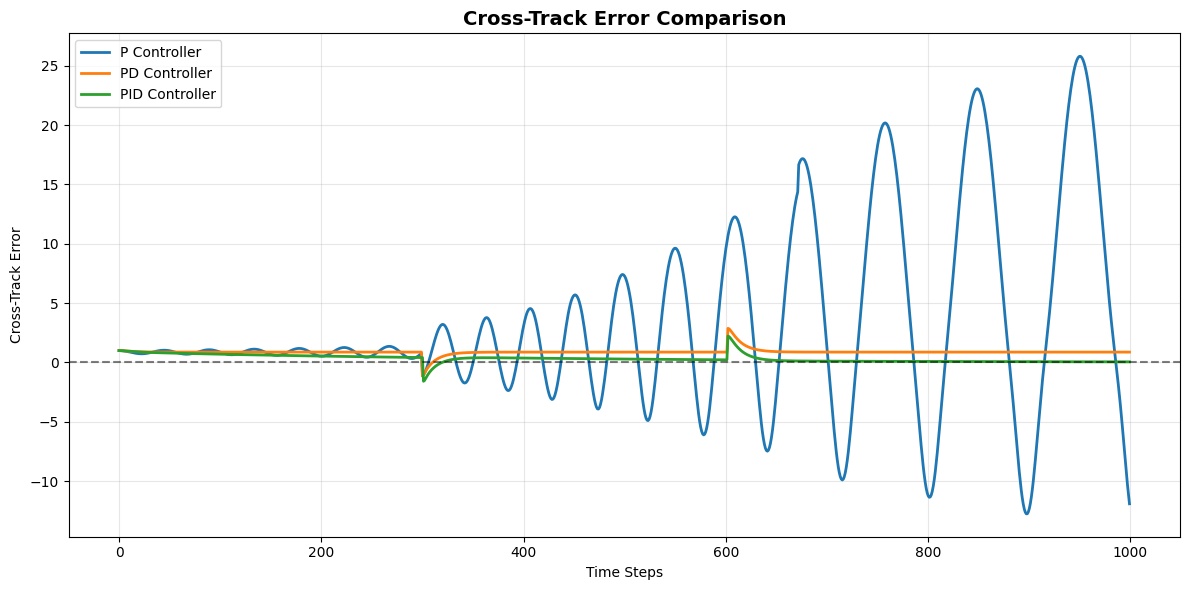

Performance Metrics:

P Controller:
  Average absolute error: 5.5034
  Maximum absolute error: 25.8069
  Final error: 11.9106

PD Controller:
  Average absolute error: 0.8897
  Maximum absolute error: 2.8727
  Final error: 0.8727

PID Controller:
  Average absolute error: 0.3543
  Maximum absolute error: 2.2204
  Final error: 0.0503



In [7]:
# Analyze cross-track error for each controller
fig, ax = plt.subplots(figsize=(12, 6))

for name, Kp, Kd, Ki in controllers:
    # Reset vehicle
    vehicle = Vehicle2D()
    vehicle.set(0, 1, 0)
    vehicle.set_steering_drift(10/180.*np.pi)
    
    # Track errors
    errors = []
    prev_error = vehicle.compute_error(targets)
    cumulative_error = 0
    
    for i in range(track_length):
        current_error = vehicle.compute_error(targets)
        errors.append(current_error)
        cumulative_error += current_error
        diff = current_error - prev_error
        prev_error = current_error
        
        steer = -Kp * current_error - Kd * diff - Ki * cumulative_error
        vehicle.move(steer, 1.0)
    
    ax.plot(errors, label=name, linewidth=2)

ax.set_xlabel('Time Steps')
ax.set_ylabel('Cross-Track Error')
ax.set_title('Cross-Track Error Comparison', fontsize=14, weight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Calculate performance metrics
print("Performance Metrics:\n")
for name, Kp, Kd, Ki in controllers:
    vehicle = Vehicle2D()
    vehicle.set(0, 1, 0)
    vehicle.set_steering_drift(10/180.*np.pi)
    
    errors = []
    prev_error = vehicle.compute_error(targets)
    cumulative_error = 0
    
    for i in range(track_length):
        current_error = vehicle.compute_error(targets)
        errors.append(abs(current_error))
        cumulative_error += current_error
        diff = current_error - prev_error
        prev_error = current_error
        
        steer = -Kp * current_error - Kd * diff - Ki * cumulative_error
        vehicle.move(steer, 1.0)
    
    print(f"{name}:")
    print(f"  Average absolute error: {np.mean(errors):.4f}")
    print(f"  Maximum absolute error: {np.max(errors):.4f}")
    print(f"  Final error: {errors[-1]:.4f}")
    print()

## Speed Control with PID

Besides steering control, PID is also used for speed control (cruise control). Let's implement a simple speed controller:

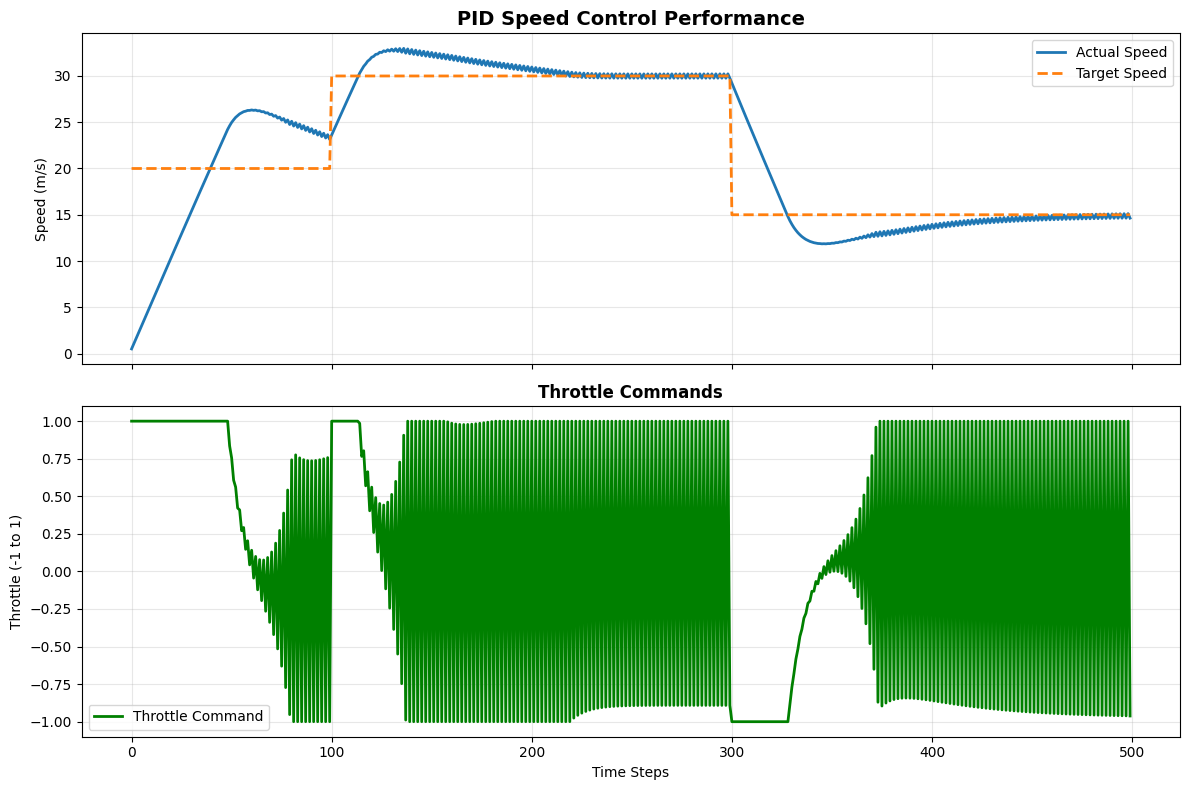

In [9]:
class SpeedController:
    def __init__(self, Kp=0.5, Ki=0.1, Kd=0.2):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.prev_error = 0
        self.integral = 0
        
    def compute_throttle(self, target_speed, current_speed, dt=0.1):
        error = target_speed - current_speed
        self.integral += error * dt
        derivative = (error - self.prev_error) / dt
        
        # PID formula
        throttle = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        
        self.prev_error = error
        
        # Clamp throttle between -1 and 1
        return np.clip(throttle, -1, 1)

# Simulate speed control
def simulate_speed_control(target_speeds, n_steps=500):
    controller = SpeedController(Kp=0.5, Ki=0.1, Kd=0.2)
    
    current_speed = 0
    speeds = []
    throttles = []
    targets = []
    
    # Simple vehicle dynamics: acceleration based on throttle
    mass = 1000  # kg
    drag_coefficient = 0.3
    
    for i in range(n_steps):
        # Determine target speed for this timestep
        if i < 100:
            target = target_speeds[0]
        elif i < 300:
            target = target_speeds[1]
        else:
            target = target_speeds[2]
        
        targets.append(target)
        
        # Compute throttle
        throttle = controller.compute_throttle(target, current_speed)
        throttles.append(throttle)
        
        # Simple dynamics
        force = throttle * 5000  # Max force
        drag = drag_coefficient * current_speed ** 2
        acceleration = (force - drag) / mass
        
        current_speed += acceleration * 0.1  # dt = 0.1
        current_speed = max(0, current_speed)  # No reverse
        speeds.append(current_speed)
    
    return speeds, throttles, targets

# Run simulation
target_speeds = [20, 30, 15]  # m/s
speeds, throttles, targets = simulate_speed_control(target_speeds)

# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax1.plot(speeds, label='Actual Speed', linewidth=2)
ax1.plot(targets, '--', label='Target Speed', linewidth=2)
ax1.set_ylabel('Speed (m/s)')
ax1.set_title('PID Speed Control Performance', fontsize=14, weight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(throttles, label='Throttle Command', color='green', linewidth=2)
ax2.set_ylabel('Throttle (-1 to 1)')
ax2.set_xlabel('Time Steps')
ax2.set_title('Throttle Commands', fontsize=12, weight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-1.1, 1.1)

plt.tight_layout()
plt.show()

## PID Tuning Guidelines

Tuning PID controllers is both an art and science. Here are some practical guidelines:

### Manual Tuning Process:
1. **Start with P only** (Kd = Ki = 0)
   - Increase Kp until system oscillates
   - Reduce Kp to about 50% of oscillation point

2. **Add D term**
   - Increase Kd to dampen oscillations
   - Too much D causes sluggish response

3. **Add I term** (if needed)
   - Start with small Ki
   - Increase to eliminate steady-state error
   - Watch for integral windup

### Common Issues and Solutions:

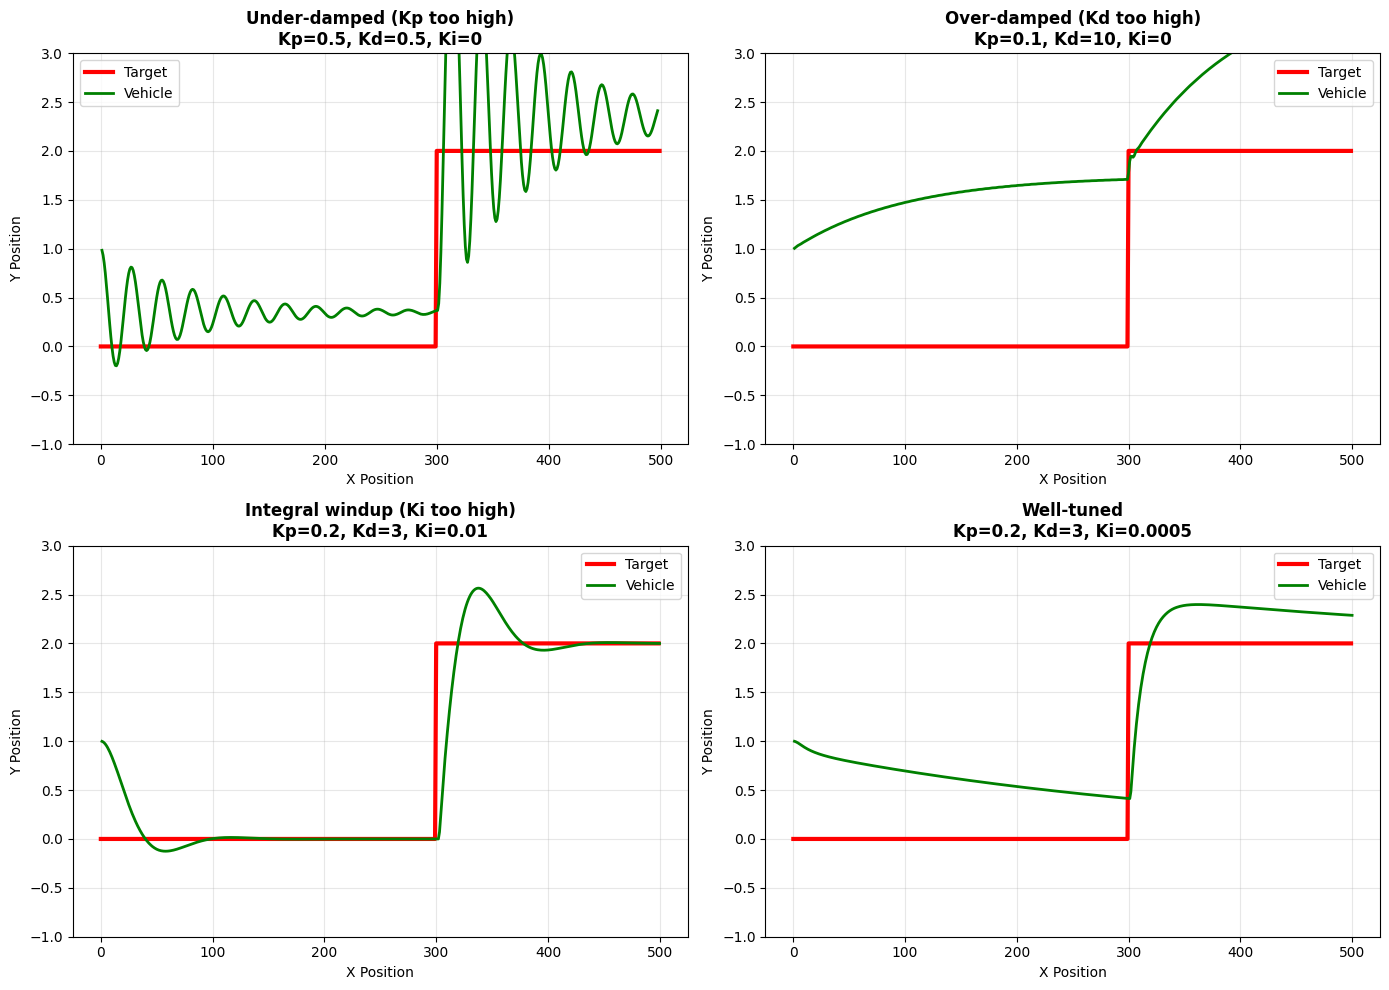

PID Tuning Tips:

1. Under-damped (oscillation):
   - Reduce Kp or increase Kd

2. Over-damped (slow response):
   - Reduce Kd or increase Kp

3. Integral windup:
   - Reduce Ki or implement anti-windup
   - Reset integral when error changes sign

4. Steady-state error:
   - Increase Ki (carefully!)


In [8]:
# Demonstrate PID tuning effects
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Different tuning scenarios
tuning_scenarios = [
    ('Under-damped (Kp too high)', 0.5, 0.5, 0),
    ('Over-damped (Kd too high)', 0.1, 10, 0),
    ('Integral windup (Ki too high)', 0.2, 3, 0.01),
    ('Well-tuned', 0.2, 3, 0.0005)
]

for idx, (name, Kp, Kd, Ki) in enumerate(tuning_scenarios):
    vehicle = Vehicle2D()
    vehicle.set(0, 1, 0)
    vehicle.set_steering_drift(10/180.*np.pi)
    
    x_traj, y_traj = vehicle.run_PID(targets[:500], Kp, Kd, Ki, 500)
    
    ax = axes[idx]
    ax.plot(track_x[:500], track_y[:500], 'r-', linewidth=3, label='Target')
    ax.plot(x_traj, y_traj, 'g-', linewidth=2, label='Vehicle')
    ax.set_title(f'{name}\nKp={Kp}, Kd={Kd}, Ki={Ki}', fontsize=12, weight='bold')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-1, 3)

plt.tight_layout()
plt.show()

print("PID Tuning Tips:")
print("\n1. Under-damped (oscillation):")
print("   - Reduce Kp or increase Kd")
print("\n2. Over-damped (slow response):")
print("   - Reduce Kd or increase Kp")
print("\n3. Integral windup:")
print("   - Reduce Ki or implement anti-windup")
print("   - Reset integral when error changes sign")
print("\n4. Steady-state error:")
print("   - Increase Ki (carefully!)")

# Exercises

## Exercise 1: Using PID to upright a pole
In this exercise, we use the gym library to create a 1-D CartPole environment. The Cartpole-v1 environment returns four states:
- state[0]: cart position;
- state[1]: cart velocity;
- state[2]: pole angle;
- state[3]: pole angle velocity.

In the code below, whenever the game can keep the pole upright, the player earns one point. Please attempt to find an optimal Kp, Ki, and Kd such that the game can achieve the max reward of 500.

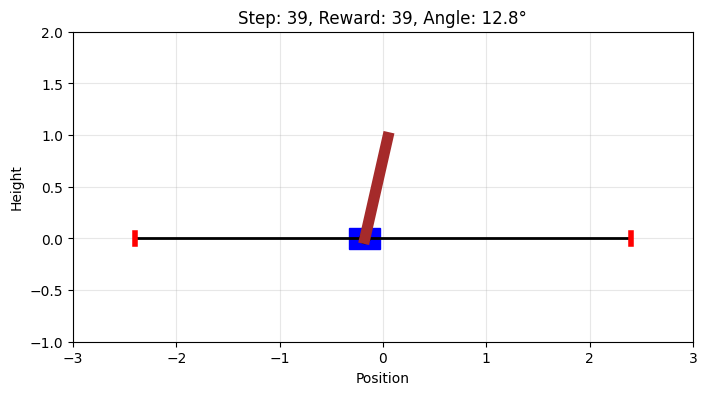


Game Over! Lasted 39 steps with total reward: 39.0


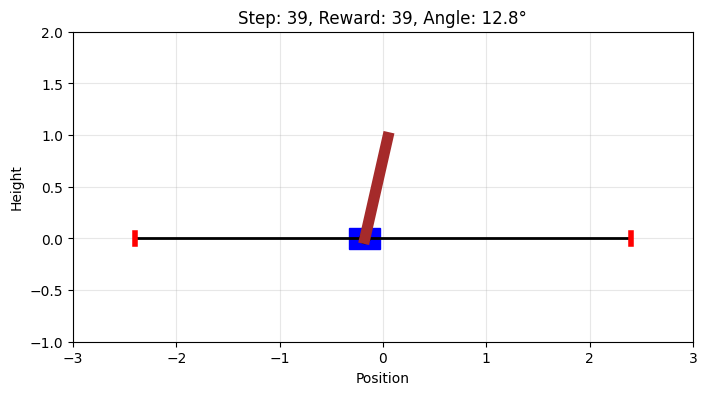


PID Controller Performance:
  Kp = 10.0 (Proportional)
  Ki = 0 (Integral)
  Kd = 0 (Derivative)
  Steps survived: 39
  Total reward: 39.0


In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

# Exercise: Please adjust the Kp, Ki, and Kd to achieve the max 500 points
Kp = 10
Ki = 0
Kd = 0

def pid_controller(angle, angle_velocity, integral, prev_error, dt=0.02):
    error = angle
    integral += error * dt
    derivative = (error - prev_error) / dt
    control = Kp * error + Ki * integral + Kd * derivative
    return control, integral, error

# Try different ways to create the environment
env = None
render_method = None

# Method 1: Try with old API
try:
    env = gym.make('CartPole-v1')
    env.reset()
    env.render(mode='rgb_array')
    render_method = 'old_rgb'
    print("Using old render API with rgb_array mode")
except:
    pass

# Method 2: Try default render
if env is None or render_method is None:
    try:
        env = gym.make('CartPole-v1')
        env.reset()
        env.render()
        render_method = 'old_default'
        print("Using old render API with default mode")
    except:
        pass

# Method 3: Just create environment without render
if env is None:
    env = gym.make('CartPole-v1')
    render_method = 'manual'
    print("Created environment, will attempt manual visualization")

# Test reset to check API version
state_or_tuple = env.reset()
if isinstance(state_or_tuple, tuple):
    state, _ = state_or_tuple
    uses_new_api = True
else:
    state = state_or_tuple
    uses_new_api = False

print(f"API version: {'new' if uses_new_api else 'old'}")

# Function to get frame based on render method
def get_frame(env, render_method):
    try:
        if render_method == 'old_rgb':
            return env.render(mode='rgb_array')
        elif render_method == 'old_default':
            # Try to get rgb_array even if not default
            try:
                return env.render(mode='rgb_array')
            except:
                return None
        else:
            return None
    except:
        return None

# Manual visualization fallback
def draw_cartpole_state(state, step, reward):
    """Manually draw the cartpole state"""
    cart_pos = state[0]
    pole_angle = state[2]
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Set up the plot
    ax.set_xlim(-3, 3)
    ax.set_ylim(-1, 2)
    ax.set_aspect('equal')
    
    # Draw track
    ax.plot([-2.4, 2.4], [0, 0], 'k-', linewidth=2)
    ax.plot([-2.4, -2.4], [-0.05, 0.05], 'r-', linewidth=4)
    ax.plot([2.4, 2.4], [-0.05, 0.05], 'r-', linewidth=4)
    
    # Draw cart
    cart_width = 0.3
    cart_height = 0.2
    cart = plt.Rectangle((cart_pos - cart_width/2, -cart_height/2), 
                        cart_width, cart_height, 
                        fill=True, color='blue')
    ax.add_patch(cart)
    
    # Draw pole
    pole_length = 1.0
    pole_end_x = cart_pos + pole_length * np.sin(pole_angle)
    pole_end_y = pole_length * np.cos(pole_angle)
    ax.plot([cart_pos, pole_end_x], [0, pole_end_y], 'brown', linewidth=8)
    
    # Add pole joint
    circle = plt.Circle((cart_pos, 0), 0.05, color='black')
    ax.add_patch(circle)
    
    # Add title
    ax.set_title(f'Step: {step}, Reward: {reward:.0f}, Angle: {np.degrees(pole_angle):.1f}°')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('Position')
    ax.set_ylabel('Height')
    
    return fig

# Run one episode
angle = state[2]
angle_velocity = state[3]
integral = 0.0
prev_error = angle
total_reward = 0

print("\nRunning CartPole with PID Controller...")
print("Watch the game below:\n")

for t in range(500):
    # PID control
    control, integral, prev_error = pid_controller(angle, angle_velocity, integral, prev_error)
    action = 1 if control > 0 else 0
    
    # Step environment
    if uses_new_api:
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
    else:
        state, reward, done, info = env.step(action)
    
    # Update state
    angle = state[2]
    angle_velocity = state[3]
    total_reward += reward
    
    # Display every 10 steps or when done
    if t % 10 == 0 or done:
        clear_output(wait=True)
        
        # Try to get frame
        frame = get_frame(env, render_method)
        
        if frame is not None:
            # Display captured frame
            plt.figure(figsize=(8, 6))
            plt.imshow(frame)
            plt.axis('off')
            plt.title(f'Step: {t+1}, Reward: {total_reward:.0f}')
            plt.show()
        else:
            # Use manual visualization
            fig = draw_cartpole_state(state, t+1, total_reward)
            plt.show()
            plt.close()
    
    if done:
        print(f"\nGame Over! Lasted {t + 1} steps with total reward: {total_reward}")
        
        # Show final state
        fig = draw_cartpole_state(state, t+1, total_reward)
        plt.show()
        plt.close()
        break
else:
    print(f"\nCompleted all 200 steps! Total reward: {total_reward}")

env.close()

# Show summary
print(f"\nPID Controller Performance:")
print(f"  Kp = {Kp} (Proportional)")
print(f"  Ki = {Ki} (Integral)")
print(f"  Kd = {Kd} (Derivative)")
print(f"  Steps survived: {t + 1}")
print(f"  Total reward: {total_reward}")

# Challenges

Now it's time to challenge what you've learned! Complete the following exercises to reinforce your understanding of autonomous driving and PID control.

## Challenge 1: Circular Track Navigation
Create a circular track and implement PID control to make the vehicle follow it. Experiment with different PID gains.

In [ ]:
# Your code here
# Hint: Create circular track points using:
# x = center_x + radius * cos(angle)
# y = center_y + radius * sin(angle)

## Challenge 2: Performance Analysis
Compare the performance of P, PD, and PID controllers on a figure-8 track. Measure and plot:
- Average cross-track error
- Maximum deviation from track
- Time to complete the track
- Control effort (sum of absolute steering commands)

In [ ]:
# Your code here
# Create figure-8 track and analyze performance metrics

# Summary

In this comprehensive lecture, we've covered:

* **Autonomous Driving Fundamentals**
  - History and evolution of vehicle automation
  - Five levels of autonomy (L0-L5)
  - System architecture for autonomous vehicles

* **Vehicle Kinematics**
  - Degrees of freedom in robotics
  - Simplified bicycle model
  - Kinematic equations for vehicle motion

* **PID Control Theory**
  - Proportional, Integral, and Derivative terms
  - Control system behavior and characteristics
  - Tuning guidelines and best practices

* **Practical Implementation**
  - Vehicle2D class for simulation
  - PID control for steering (lateral control)
  - PID control for speed (longitudinal control)
  - Performance analysis and optimization

PID control remains one of the most important and widely used control algorithms in engineering, despite being over 100 years old. Its simplicity, robustness, and effectiveness make it an excellent starting point for autonomous vehicle control.

As you continue your journey in autonomous systems, remember that PID is just the beginning. Modern autonomous vehicles use more advanced techniques like Model Predictive Control (MPC), reinforcement learning, and neural networks. However, the fundamental principles you've learned here will serve as a solid foundation for understanding these more complex methods.

Keep experimenting, keep learning, and most importantly, keep building!